# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [495]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [496]:
car_cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration','modelYear','origin','carName']
cars_df = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',names= car_cols)
cars_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear,origin,carName
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,"""chevrolet impala"""
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,"""plymouth fury iii"""
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,"""pontiac catalina"""
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,"""amc ambassador dpl"""


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [3]:
## Description mentioned that horsepower column contains ? for some of the rows

## On performing info(), it is seen that horsepower column is an object datatype.
## Morover, Description on the dataframe doesn't display horsepower column, indicating it has to be converted to some 
## numeric datatype

In [497]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
modelYear       398 non-null int64
origin          398 non-null int64
carName         398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [498]:
cars_df.shape

(398, 9)

In [499]:
cars_df[cars_df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear,origin,carName
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


In [500]:
cars_df.describe()

,mpg,cylinders,displacement,weight,acceleration,modelYear,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

In [501]:
## Input median value for horsepower in missing rows

horsepower = cars_df[np.logical_not(cars_df['horsepower']=='?')]['horsepower'].astype('float')
cars_df['horsepowerf'] = horsepower
cars_df[cars_df['horsepowerf'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear,origin,carName,horsepowerf
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto""",NaN
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick""",NaN
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe""",NaN
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra""",NaN
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i""",NaN
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl""",NaN


In [502]:
cars_df['horsepowerf'].fillna(cars_df[np.logical_not(cars_df['horsepowerf'].isna())]['horsepowerf'].median(),inplace=True)
cars_df[cars_df['horsepowerf'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear,origin,carName,horsepowerf


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

In [503]:
cars_df.corr()

,mpg,cylinders,displacement,weight,acceleration,modelYear,origin,horsepowerf
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450,-0.773453
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543,0.841284
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409,0.895778
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024,0.862442
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873,-0.686590
modelYear,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662,-0.413733
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000,-0.452096
horsepowerf,-0.773453,0.841284,0.895778,0.862442,-0.686590,-0.413733,-0.452096,1.000000


C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


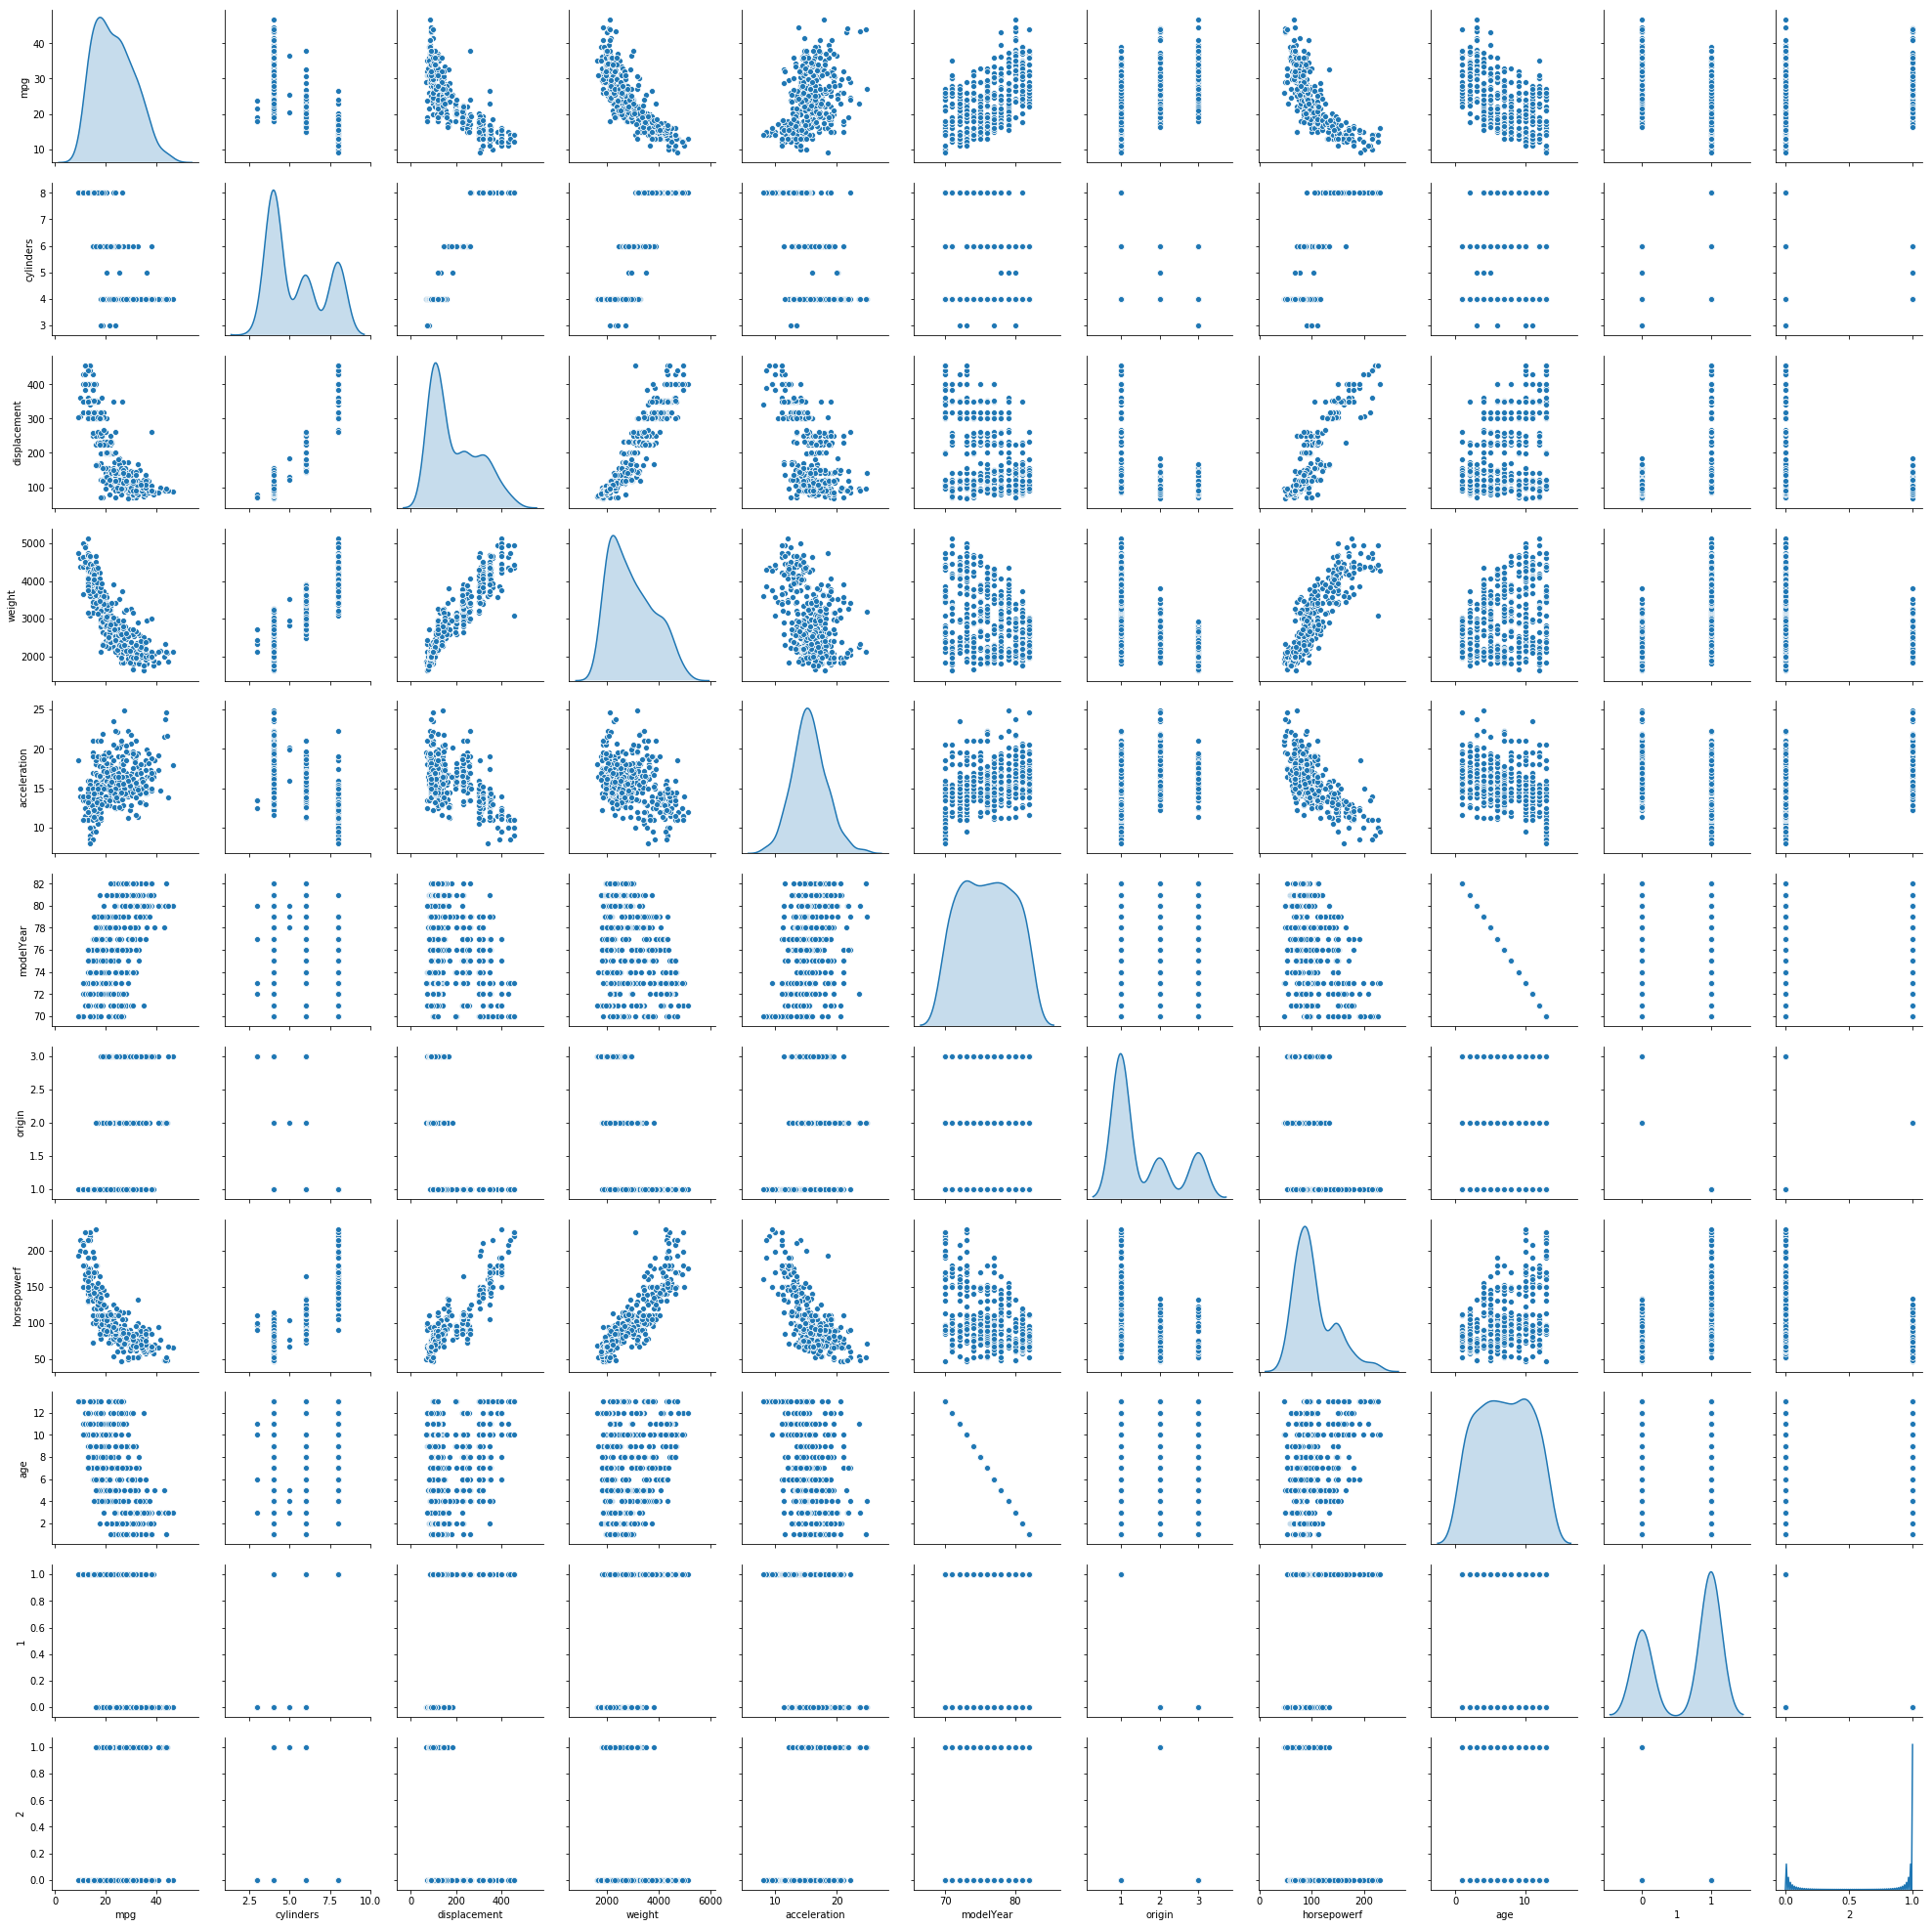

In [546]:
sns.pairplot(cars_df, diag_kind='kde')

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64


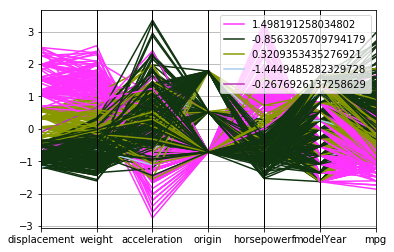

In [505]:
# plot parallel coordinates
from pandas.plotting import parallel_coordinates
from scipy.stats import zscore
X_df = cars_df[['cylinders','displacement','weight','acceleration','origin','horsepowerf','modelYear','mpg']]
X_df = X_df.apply(zscore)
print(cars_df['cylinders'].value_counts())
pc = parallel_coordinates(X_df, 'cylinders', color=('#FF34FF','#113411','#889900','#ABCDEF','#BB34BB'))

1    249
3     79
2     70
Name: origin, dtype: int64


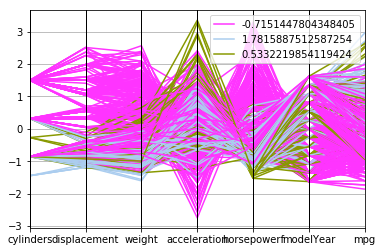

In [506]:
# plot parallel coordinates
from pandas.plotting import parallel_coordinates
from scipy.stats import zscore
X_df = cars_df[['cylinders','displacement','weight','acceleration','origin','horsepowerf','modelYear','mpg']]
X_df = X_df.apply(zscore)
print(cars_df['origin'].value_counts())
pc = parallel_coordinates(X_df, 'origin', color=('#FF34FF','#ABCDEF','#889900'))

In [ ]:
## Understanding relation between Categorical variables (origin,cylinders) with mpg

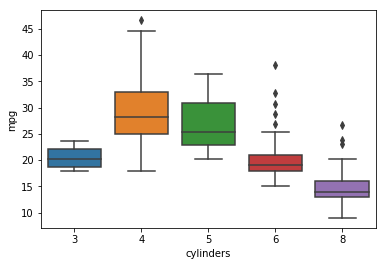

In [547]:
sns.boxplot(x='cylinders',y='mpg',data=cars_df)

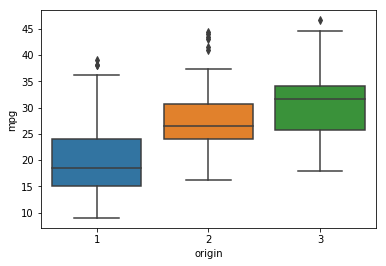

In [548]:
sns.boxplot(x='origin',y='mpg',data=cars_df)

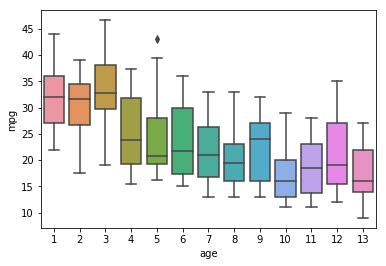

In [549]:
sns.boxplot(x='age',y='mpg',data=cars_df)

In [ ]:
## Understanding relation between continous variables (weight,displacement,horsepower,acceleration) with mpg

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


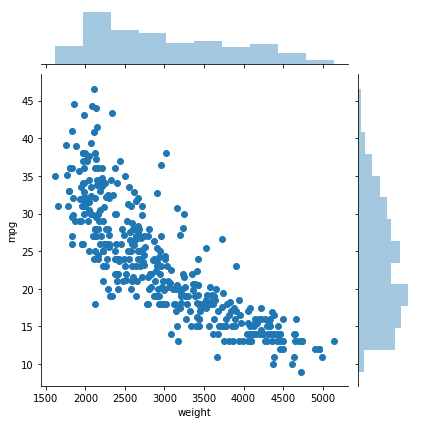

In [556]:
sns.jointplot(x='weight',y='mpg',data=cars_df)

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


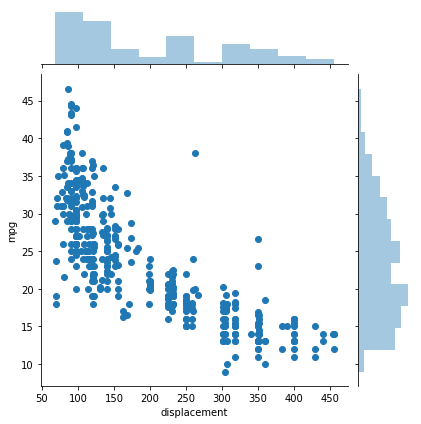

In [562]:
sns.jointplot(x='displacement',y='mpg',data=cars_df)

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


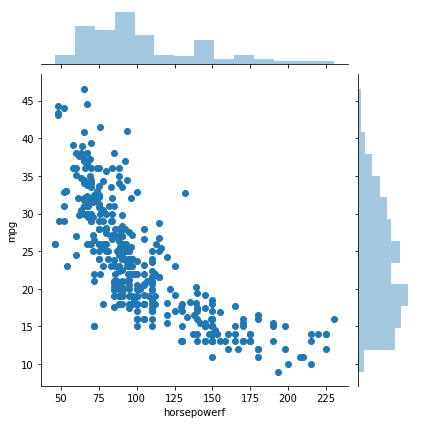

In [563]:
sns.jointplot(x='horsepowerf',y='mpg',data=cars_df)

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


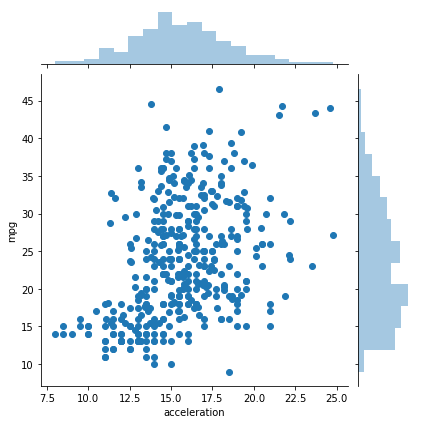

In [564]:
sns.jointplot(x='acceleration',y='mpg',data=cars_df)

In [551]:
#Observations

## Pairplot
## --------
## mpg has very strong correlation (> 75%) with cylinders, displacement, weight and horsepower
## mpg also has a correlation of 50-75% with acceleration, modelYear and origin
## mpg has < 50% correlation with acceleration

## Among the above, cylinders, displacement, weight and horsepowerf has very high correlation, thereby it may cause 
## multi-collinearity

## ParallelCoordinate plot on zscored data
## ---------------------------------------
## Based on cylinders
    ## Data based on no.of cylinders is not equally represented as there are very thin lines for values 3 and 5
    ## This gives an idea that higher cylinder cars have higher displacement, weight and horsepower, thereby lower mileage
## Based on origin
    ## This gives an idea that there are more US origin cars than Japanese and German origin cars (more pink lines)
    
## Japan cars (origin=3) focussed more on high mpg
## As the age increases, mpg of the car goes down
## 4-cylinder cars gives higher mpg, whereas 8-cylinder cars gives less mpg
## Lesser weight car gives high mpg, whereas high weighed ones gives less mpg

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [484]:
# Further dig into data shows max mpd is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age
    
# Transformation is done after forming the new dataframe

In [507]:
## Avg mpg of 4 cylinder cars are higher
col = ['cylinders','origin']
for colk in col:
    for k in cars_df[colk].unique():
        print('mpg for ',k,' - ',colk,' car is ',cars_df[cars_df[colk]==k]['mpg'].max())

mpg for  8  -  cylinders  car is  26.6
mpg for  4  -  cylinders  car is  46.6
mpg for  6  -  cylinders  car is  38.0
mpg for  3  -  cylinders  car is  23.7
mpg for  5  -  cylinders  car is  36.4
mpg for  1  -  origin  car is  39.0
mpg for  3  -  origin  car is  46.6
mpg for  2  -  origin  car is  44.3


In [508]:
cars_df['modelYear'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: modelYear, dtype: int64

In [509]:
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
# subtract year from 83 to get the age

## Creating new column 'Age' with the calculated value

cars_df['age'] = 83-cars_df['modelYear']
cars_df.head()
cars_df['age'].value_counts()

10    40
5     36
7     34
1     31
8     30
13    29
4     29
3     29
2     29
12    28
11    28
6     28
9     27
Name: age, dtype: int64

In [510]:
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Origin - 1 - US
# Origin - 2 - Germany
# Origin - 3 - Japan
## Forming new columns 1 and 2 with 3rd columns dropped to avoid multicollinearity

originDummy = pd.get_dummies(cars_df['origin'])
cars_df = pd.concat([cars_df,originDummy], axis=1)
cars_df.head(10)
cars_df.drop(3, axis=1, inplace=True)
cars_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear,origin,carName,horsepowerf,age,1,2
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu""",130.0,13,1,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320""",165.0,13,1,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite""",150.0,13,1,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst""",150.0,13,1,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino""",140.0,13,1,0
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500""",198.0,13,1,0
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,"""chevrolet impala""",220.0,13,1,0
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,"""plymouth fury iii""",215.0,13,1,0
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,"""pontiac catalina""",225.0,13,1,0
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,"""amc ambassador dpl""",190.0,13,1,0


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [14]:
# Missing value check was done above and hp column was treated with median values
# Let us check for outliers now

## Performing histogram on each column in the dataframe gives an idea of the normal distribution of the data in each column
## mpg has right skewed data (positive skew value) with one outlier (46.6 mpg)
## Create X with variables (mpg,cylinders,displacement,weight,acceleration,horsepowerf,age,1,2) and standardize using minmaxscale

In [517]:
cars_df.describe()

,mpg,cylinders,displacement,weight,acceleration,modelYear,origin,horsepowerf,age,1,2
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,104.304020,6.989950,0.625628,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,38.222625,3.697627,0.484569,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,46.000000,1.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,76.000000,4.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,93.500000,7.000000,1.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,125.000000,10.000000,1.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,230.000000,13.000000,1.000000,1.000000


In [565]:
cars_df.corr()

,mpg,cylinders,displacement,weight,acceleration,modelYear,origin,horsepowerf,age,1,2
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450,-0.773453,-0.579267,-0.568192,0.259022
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543,0.841284,0.348746,0.604351,-0.352861
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409,0.895778,0.370164,0.651407,-0.373886
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024,0.862442,0.306564,0.598398,-0.298843
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873,-0.686590,-0.288137,-0.250806,0.204473
modelYear,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662,-0.413733,-1.000000,-0.139883,-0.024489
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000,-0.452096,-0.180662,-0.924486,0.246332
horsepowerf,-0.773453,0.841284,0.895778,0.862442,-0.686590,-0.413733,-0.452096,1.000000,0.413733,0.485418,-0.282877
age,-0.579267,0.348746,0.370164,0.306564,-0.288137,-1.000000,-0.180662,0.413733,1.000000,0.139883,0.024489
1,-0.568192,0.604351,0.651407,0.598398,-0.250806,-0.139883,-0.924486,0.485418,0.139883,1.000000,-0.597198


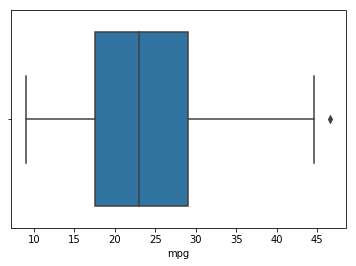

In [515]:
sns.boxplot(cars_df['mpg'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E09EF73940>,
      dtype=object)

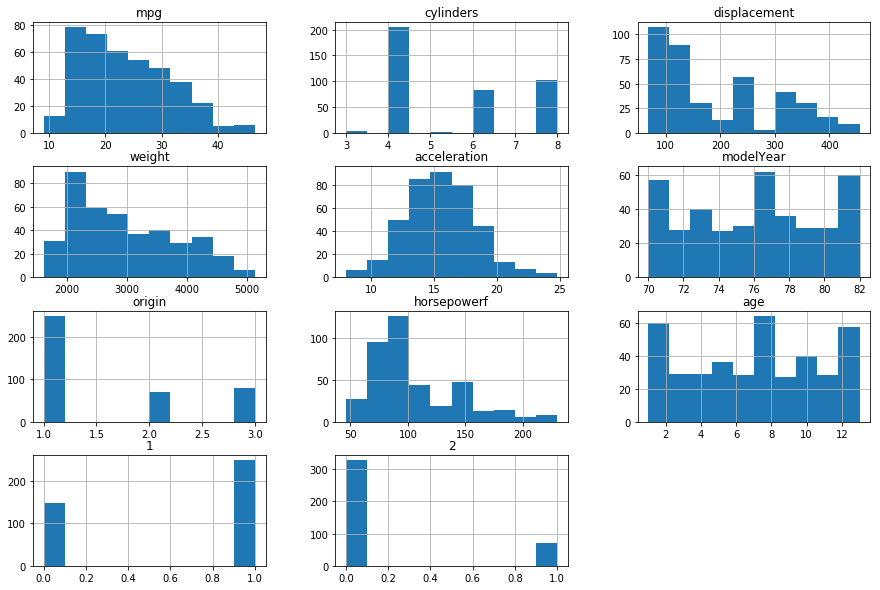

In [511]:
cars_df.hist(figsize=(15,10)) ## Univariate analysis

In [513]:
cars_df.kurtosis()

mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
weight         -0.785529
acceleration    0.419497
modelYear      -1.181232
origin         -0.817597
horsepowerf     0.763583
age            -1.181232
1              -1.737175
2               0.925756
dtype: float64

In [514]:
cars_df.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
weight          0.531063
acceleration    0.278777
modelYear       0.011535
origin          0.923776
horsepowerf     1.106224
age            -0.011535
1              -0.521133
2               1.709131
dtype: float64

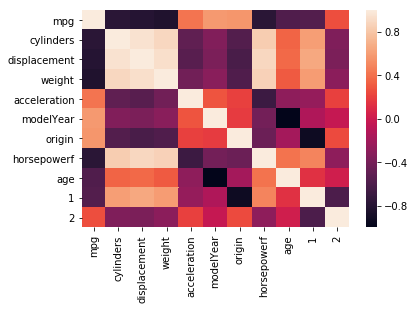

In [544]:
sns.heatmap(cars_df.corr())

In [774]:
## Creating new dataframe with the required variables and transforming using MinMaxScaler

X = cars_df[['mpg','cylinders','displacement','weight','acceleration','horsepowerf','age',1,2]]
mm = MinMaxScaler(feature_range=(0,1))
X = mm.fit_transform(X)
X = pd.DataFrame(data = X,columns=['mpg','cylinders','displacement','weight','acceleration','horsepowerf','age','USA','Germany'])
X.head(10)

,mpg,cylinders,displacement,weight,acceleration,horsepowerf,age,USA,Germany
0,0.239362,1.0,0.617571,0.536150,0.238095,0.456522,1.0,1.0,0.0
1,0.159574,1.0,0.728682,0.589736,0.208333,0.646739,1.0,1.0,0.0
2,0.239362,1.0,0.645995,0.516870,0.178571,0.565217,1.0,1.0,0.0
3,0.186170,1.0,0.609819,0.516019,0.238095,0.565217,1.0,1.0,0.0
4,0.212766,1.0,0.604651,0.520556,0.148810,0.510870,1.0,1.0,0.0
5,0.159574,1.0,0.932817,0.773462,0.119048,0.826087,1.0,1.0,0.0
6,0.132979,1.0,0.997416,0.777148,0.059524,0.945652,1.0,1.0,0.0
7,0.132979,1.0,0.961240,0.765240,0.029762,0.918478,1.0,1.0,0.0
8,0.132979,1.0,1.000000,0.797278,0.119048,0.972826,1.0,1.0,0.0
9,0.159574,1.0,0.832041,0.634250,0.029762,0.782609,1.0,1.0,0.0


# Q7. Create appropriate clusters with the new data set

In [876]:
## Creating 2-10 clusters by adding cluster_centers, inertia and inertia (cluster_errors)
## Plotting number of clusters versus cluster-errors (inertia)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
cluster_errors = []
silhoute_score = []
clusters = np.arange(2,10)
for k in clusters:
    kmc = KMeans(n_clusters=k,random_state=1)
    kmc.fit(X)
    kmc.cluster_centers_
    kmc.inertia_
    kmc.labels_
    cluster_errors.append(kmc.inertia_)
    silhoute_score.append(silhouette_score(X,kmc.labels_))

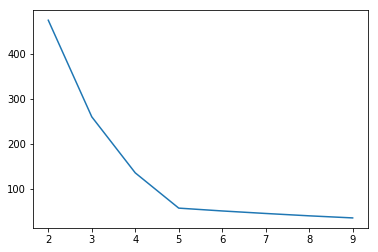

In [877]:
plt.plot(clusters,cluster_errors)

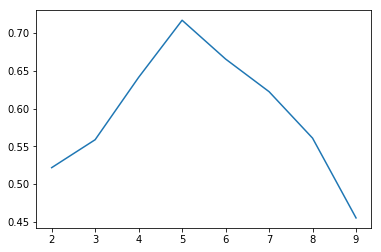

In [878]:
plt.plot(clusters,silhoute_score)

# Q8. Identify the appropriate clusters with result from above question

In [875]:
## As seen above, Elbow occurs when number of clusters = 4 or 5

## K==4

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k=4
kmc_4 = KMeans(n_clusters=k,random_state=1)
kmc_4.fit(X)
print(kmc_4.inertia_)
print(silhouette_score(X,kmc_4.labels_))

135.87248715446194
0.6413095902221911


In [874]:
## As seen above, Elbow occurs when number of clusters = 4 or 5

## K==5

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k=5
kmc_5 = KMeans(n_clusters=k,random_state=1)
kmc_5.fit(X)
print(kmc_5.inertia_)
print(silhouette_score(X,kmc_5.labels_))

57.71643936745134
0.7168891348425386


In [ ]:
## Observations
## ------------
## With k=5,inertia is less, which means cluster_errors are minimal and hence ideal number of clusters based on 
## elbow method is k=5

# Q9. Check for no of values in each cluster and centers for each variables. 

In [636]:
## Observations
## ------------
## With NumberOfClusters = 4, clusters are not seggregated in a balanced mode (i.e) number of values in each cluster varies
## With NumberOfClusters = 5, clusters are seggregated more balanced (.e) number of values in each cluster is almost the same
##
## Hence, according to the elbow principle, ideal number of clusters is 5

0    147
3    102
1     79
2     70
dtype: int64
[[ 3.90885077e-01  4.06802721e-01  2.80502382e-01  3.46431513e-01
   5.08260447e-01  2.42679681e-01  4.30839002e-01  1.00000000e+00
  -3.33066907e-16]
 [ 5.70495556e-01  2.20253165e-01  8.96869787e-02  1.72449064e-01
   4.86437613e-01  1.83888277e-01  3.79746835e-01 -7.77156117e-16
  -2.77555756e-16]
 [ 5.02431611e-01  2.31428571e-01  1.06312292e-01  2.29741990e-01
   5.23044218e-01  1.89829193e-01  5.15476190e-01 -7.77156117e-16
   1.00000000e+00]
 [ 1.56263037e-01  1.00000000e+00  7.17940923e-01  7.11236011e-01
   2.89565826e-01  6.13970588e-01  6.78921569e-01  1.00000000e+00
  -3.05311332e-16]]


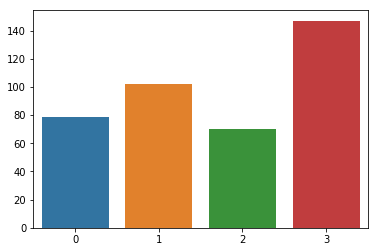

In [779]:
## noOfClusters = 4
print(pd.Series(kmc_4.labels_).value_counts())
print(kmc_4.cluster_centers_)
sns.barplot(pd.Series(kmc_4.labels_).unique(),pd.Series(kmc_4.labels_).value_counts())

4    96
1    79
2    77
0    76
3    70
dtype: int64
[[ 5.02449608e-01  2.21052632e-01  1.55361757e-01  2.39386388e-01
   5.00626566e-01  1.99549485e-01  3.17982456e-01  1.00000000e+00
  -2.77555756e-16]
 [ 5.70495556e-01  2.20253165e-01  8.96869787e-02  1.72449064e-01
   4.86437613e-01  1.83888277e-01  3.79746835e-01 -7.77156117e-16
  -2.77555756e-16]
 [ 2.75075988e-01  6.36363636e-01  4.27161985e-01  4.70006886e-01
   5.15924552e-01  2.95207510e-01  5.33549784e-01  1.00000000e+00
  -2.77555756e-16]
 [ 5.02431611e-01  2.31428571e-01  1.06312292e-01  2.29741990e-01
   5.23044218e-01  1.89829193e-01  5.15476190e-01 -7.77156117e-16
   1.00000000e+00]
 [ 1.46165780e-01  1.00000000e+00  7.26717270e-01  7.19662603e-01
   2.75793651e-01  6.29189312e-01  7.01388889e-01  1.00000000e+00
  -3.05311332e-16]]


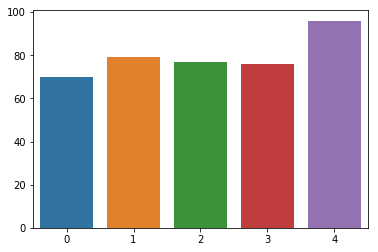

In [780]:
## noOfClusters = 5
print(pd.Series(kmc_5.labels_).value_counts())
print(kmc_5.cluster_centers_)
sns.barplot(pd.Series(kmc_5.labels_).unique(),pd.Series(kmc_5.labels_).value_counts())

# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

<h3>No. of clusters = 4</h3>
<br>
<u><b>Observations</b></u>
<br>
<li>With 4 clusters, only one cluster has more data compared to other clusters, hence imbalanced
<li>Groupwise Box plot for each of the variables shows no clear distinction b/w the groups for those variables
<li>Since all variables are standardized using minmax scaler, boxplot shows clear visualization of all variables in one scale
    <br><b> Cluster analysis of Continous variables vs mpg </b>
<li>Scatter plot of continous variables (weight, horsepowerf, acceleration) are plotted against mpg in 2D with cluster and 
    cluster center shows how the clusters are grouped. <br>
<li>Yellow colored cluster datapoints that has high Weight and horsepowerf, but less mpg and acceleration are clearly separated
<li>Blue, Green and black clusters are closely located and hence does not provide clear separation
    <br><b> Cluster analysis of Categorical variables vs mpg </b>
<li><u>cylinders</u> - Not all clusters have equal representation of cylinders, but the overall info is that 4-cylindered vehicles
    have higher mpg
<li><u>age</u> - All age vehicles except 1 and 3 has equal representation in all clusters
<li><u>origin</u>- USA origin vehicles has representation in 2 clusters and Germany,Japan each has representation in other 2 cluster
<br>
<br>
    <b><u>Summary</u></b>
    <br>The total inertia/cluster error is around 72 for 4 clusters. But, out of 4 clusters, one cluster is able to differentiate the characteristics of auto dataset clearly, while other 
    3 clusters are crowded and there is no clear separation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E14F05ECF8>,
      dtype=object)

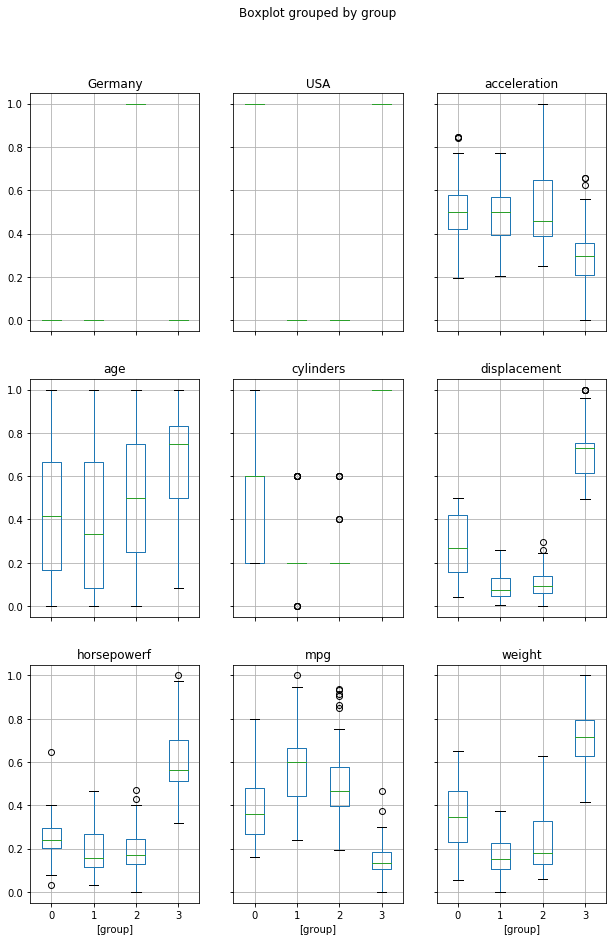

In [843]:
X.drop(columns='group',axis=1,inplace=True)
X['group'] = kmc_4.predict(X)
X[X['group'].isnull()]
X.boxplot(by='group', figsize=(10,15))

[[ 3.90885077e-01  4.06802721e-01  2.80502382e-01  3.46431513e-01
   5.08260447e-01  2.42679681e-01  4.30839002e-01  1.00000000e+00
  -3.33066907e-16]
 [ 5.70495556e-01  2.20253165e-01  8.96869787e-02  1.72449064e-01
   4.86437613e-01  1.83888277e-01  3.79746835e-01 -7.77156117e-16
  -2.77555756e-16]
 [ 5.02431611e-01  2.31428571e-01  1.06312292e-01  2.29741990e-01
   5.23044218e-01  1.89829193e-01  5.15476190e-01 -7.77156117e-16
   1.00000000e+00]
 [ 1.56263037e-01  1.00000000e+00  7.17940923e-01  7.11236011e-01
   2.89565826e-01  6.13970588e-01  6.78921569e-01  1.00000000e+00
  -3.05311332e-16]]


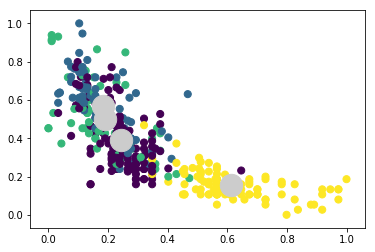

In [844]:
plt.scatter(X['horsepowerf'], X['mpg'], c=X['group'],
            s=50, cmap='viridis');
print(kmc_4.cluster_centers_)
plt.scatter(kmc_4.cluster_centers_[:,5],kmc_4.cluster_centers_[:,0],s=500, c='.80')

[[ 3.90885077e-01  4.06802721e-01  2.80502382e-01  3.46431513e-01
   5.08260447e-01  2.42679681e-01  4.30839002e-01  1.00000000e+00
  -3.33066907e-16]
 [ 5.70495556e-01  2.20253165e-01  8.96869787e-02  1.72449064e-01
   4.86437613e-01  1.83888277e-01  3.79746835e-01 -7.77156117e-16
  -2.77555756e-16]
 [ 5.02431611e-01  2.31428571e-01  1.06312292e-01  2.29741990e-01
   5.23044218e-01  1.89829193e-01  5.15476190e-01 -7.77156117e-16
   1.00000000e+00]
 [ 1.56263037e-01  1.00000000e+00  7.17940923e-01  7.11236011e-01
   2.89565826e-01  6.13970588e-01  6.78921569e-01  1.00000000e+00
  -3.05311332e-16]]


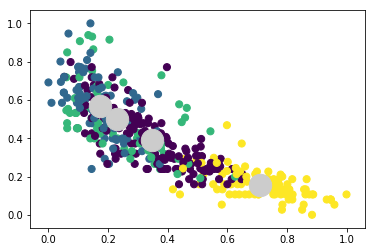

In [846]:
plt.scatter(X['weight'], X['mpg'], c=X['group'],
            s=50, cmap='viridis');
print(kmc_4.cluster_centers_)
plt.scatter(kmc_4.cluster_centers_[:,3],kmc_4.cluster_centers_[:,0],s=500, c='0.8')

[[ 3.90885077e-01  4.06802721e-01  2.80502382e-01  3.46431513e-01
   5.08260447e-01  2.42679681e-01  4.30839002e-01  1.00000000e+00
  -3.33066907e-16]
 [ 5.70495556e-01  2.20253165e-01  8.96869787e-02  1.72449064e-01
   4.86437613e-01  1.83888277e-01  3.79746835e-01 -7.77156117e-16
  -2.77555756e-16]
 [ 5.02431611e-01  2.31428571e-01  1.06312292e-01  2.29741990e-01
   5.23044218e-01  1.89829193e-01  5.15476190e-01 -7.77156117e-16
   1.00000000e+00]
 [ 1.56263037e-01  1.00000000e+00  7.17940923e-01  7.11236011e-01
   2.89565826e-01  6.13970588e-01  6.78921569e-01  1.00000000e+00
  -3.05311332e-16]]


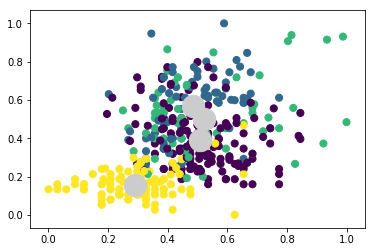

In [849]:
plt.scatter(X['acceleration'], X['mpg'], c=X['group'],
            s=50, cmap='viridis');
print(kmc_4.cluster_centers_)
plt.scatter(kmc_4.cluster_centers_[:,4],kmc_4.cluster_centers_[:,0],s=500, c='0.8')

In [824]:
## Inverse transform and store in a separate dataframe, so that the group can be analyzed better

cols = ['mpg','cylinders','displacement','weight','acceleration','horsepowerf','age','USA','Germany']
X4_i = pd.DataFrame(mm.inverse_transform(X[['mpg','cylinders','displacement','weight','acceleration','horsepowerf','age','USA','Germany']]),columns=cols)
X4_i['group'] = X['group']

<h3>Analysis of categorical variables  (origin,cylinders and age) versus mpg in each group</h3>

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


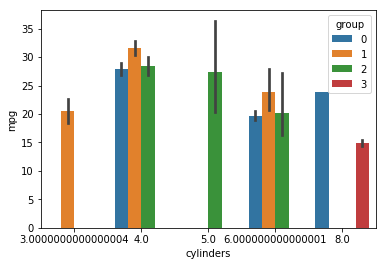

In [825]:
sns.barplot(x='cylinders',y='mpg',data=X4_i,hue='group')

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


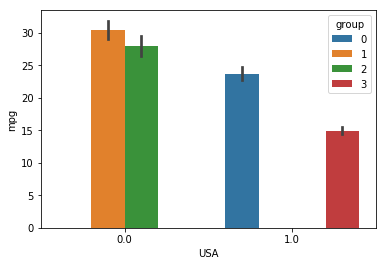

In [826]:
sns.barplot(x='USA',y='mpg',data=X4_i,hue='group')

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


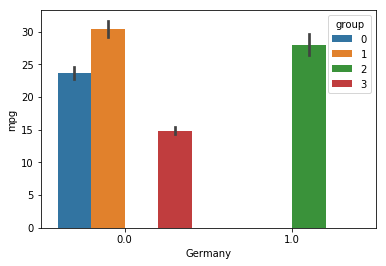

In [827]:
sns.barplot(x='Germany',y='mpg',data=X4_i,hue='group')

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


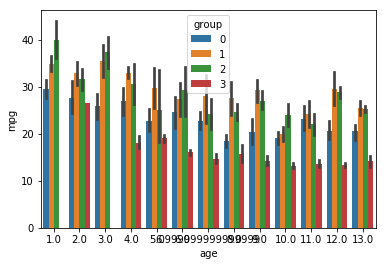

In [828]:
sns.barplot(x='age',y='mpg',data=X4_i,hue='group')

<h3>Analysis of continous variables (displacement, weight, acceleration, horsepowerf) against mpg</h3>

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\senth\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\senth\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\senth\AIML\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


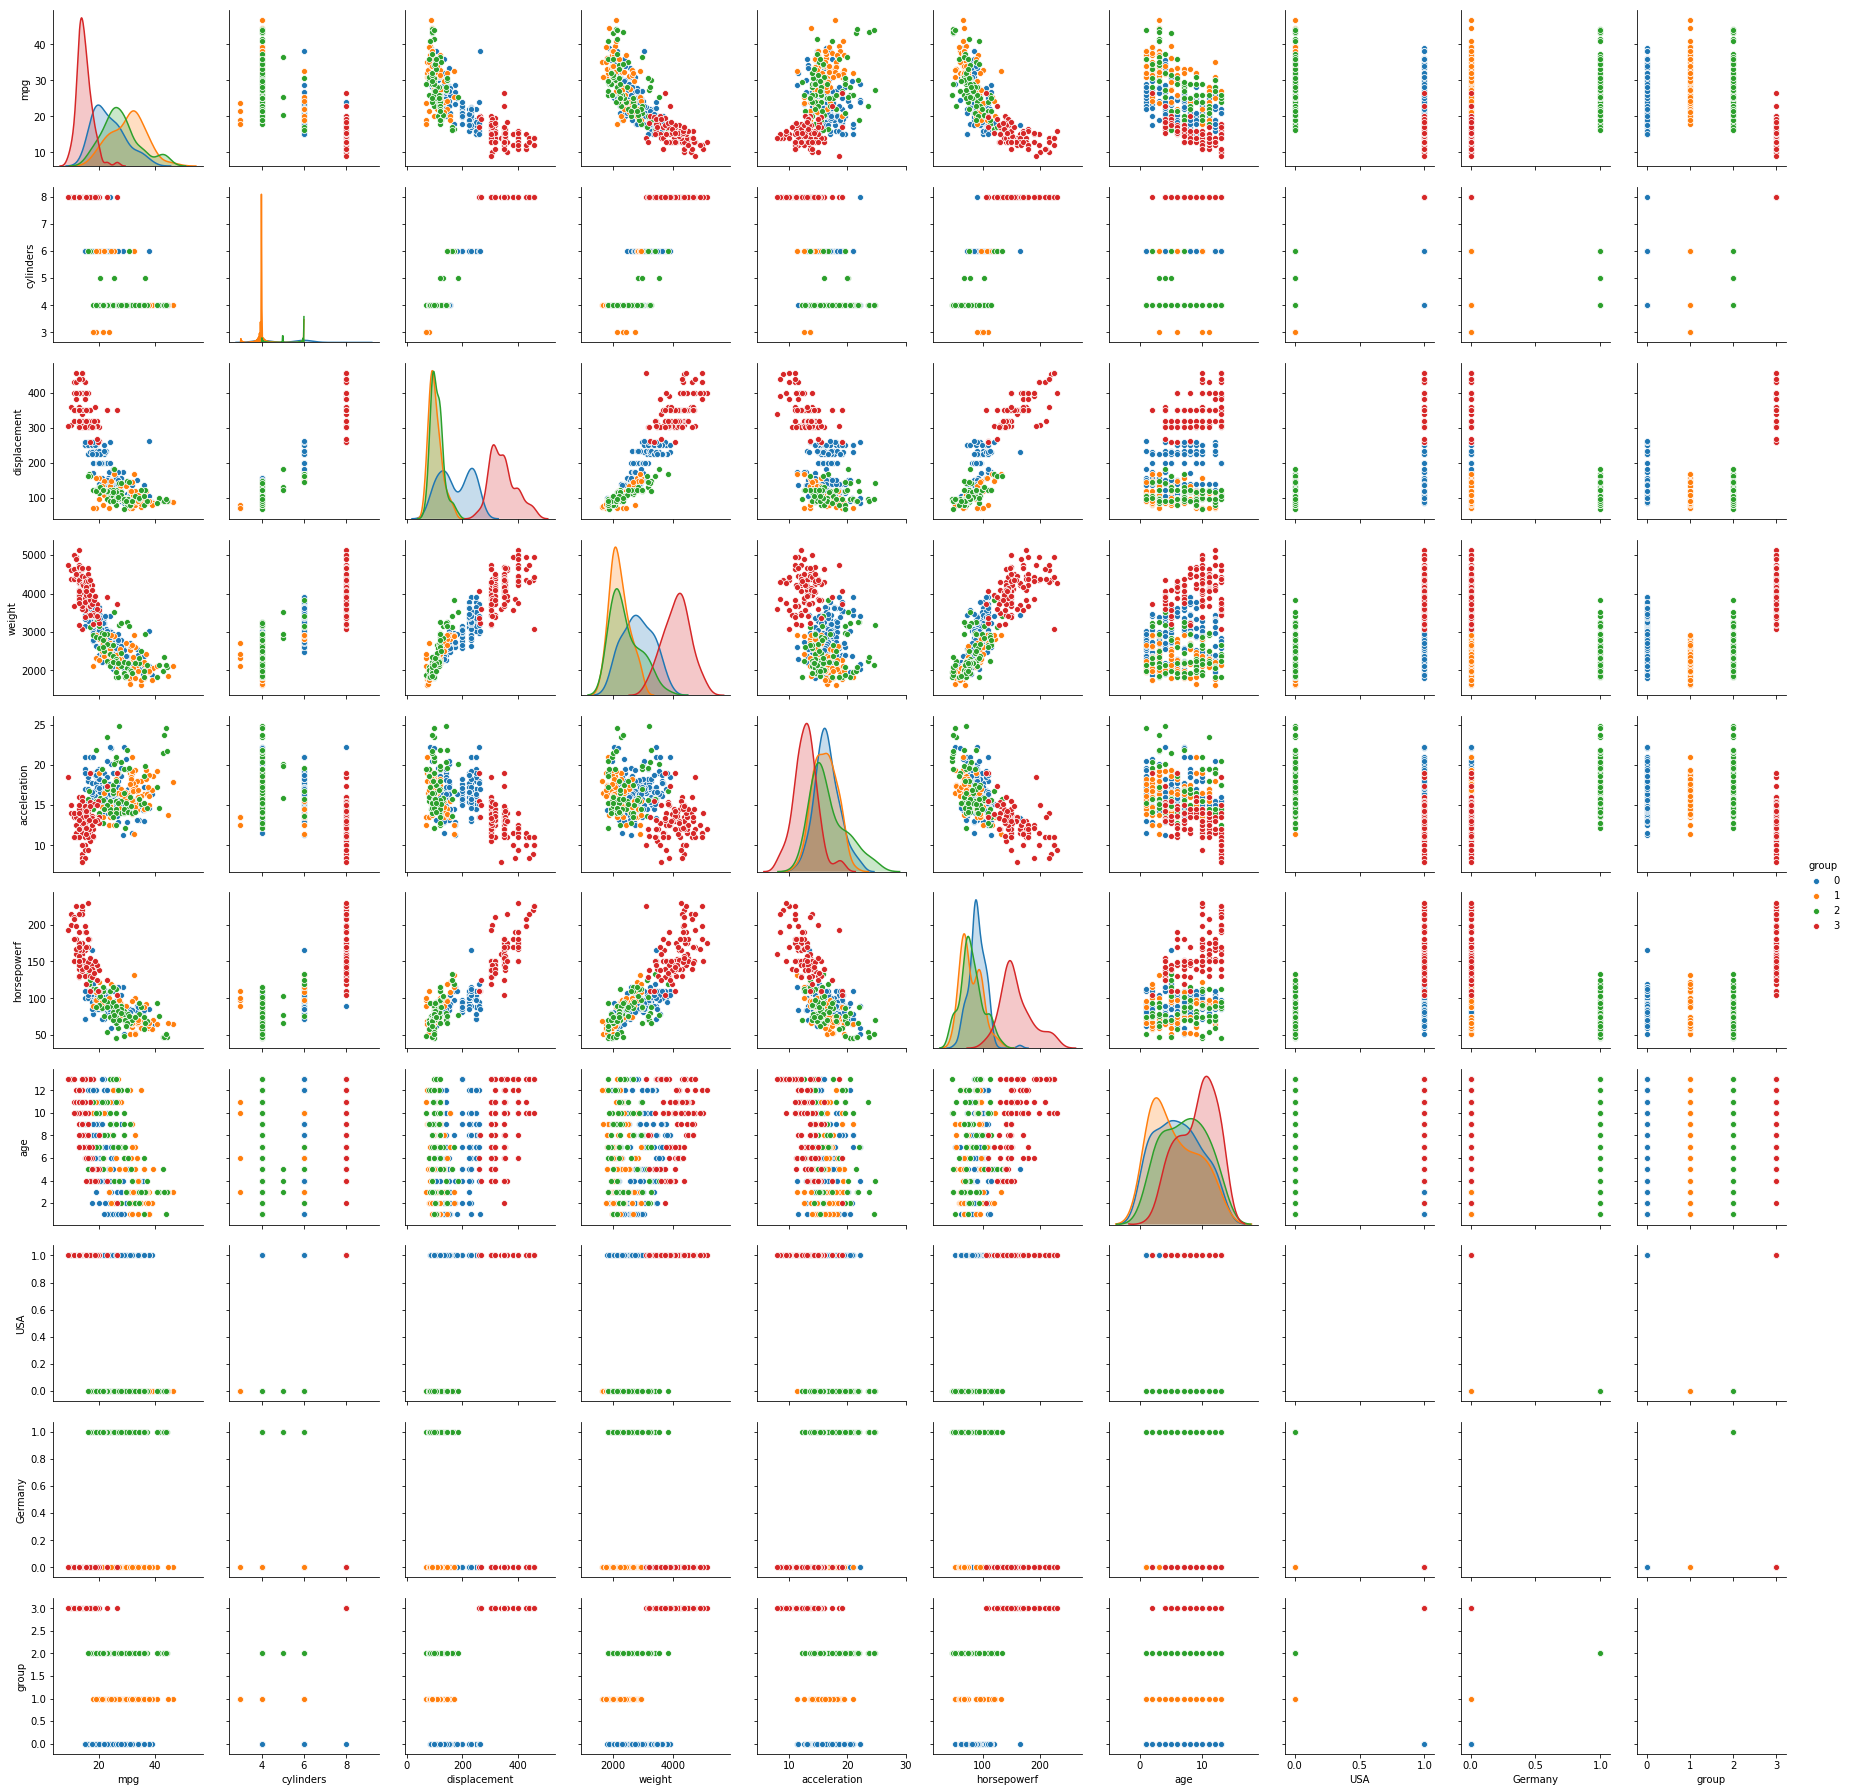

In [829]:
sns.pairplot(X4_i,hue='group',diag_kind='kde')

<h3>No. of clusters = 5</h3>
<br>
<u><b>Observations</b></u>
<br>
<li>With 5 clusters, all clusters have balanced number of datapoints
<li>Groupwise Box plot for each of the variables shows no clear distinction b/w the groups for those variables
<li>Since all variables are standardized using minmax scaler, boxplot shows clear visualization of all variables in one scale
    <br><b> Cluster analysis of Continous variables vs mpg </b>
<li>Scatter plot of continous variables (weight, horsepowerf, acceleration) are plotted against mpg in 2D with cluster and 
    cluster center shows how the clusters are grouped. <br>
<li>Yellow colored cluster datapoints that has high Weight and horsepowerf, but less mpg and acceleration are clearly separated
<li>Dark Green colored cluster datapoints that has second high Weight and horsepowerf, but high mpg and acceleration compared to yellow clusters
<li>Blue, light green  and black clusters are closely located and hence does not provide clear separation
    <br><b> Cluster analysis of Categorical variables vs mpg </b>
<li><u>cylinders</u> - Not all clusters have equal representation of cylinders, but the overall info is that 4-cylindered vehicles have higher mpg
<li><u>age</u> - All age vehicles except 1,2 and 3 has equal representation in all clusters
<li><u>origin</u>- USA origin vehicles has representation in 3 clusters and Germany,Japan each has representation in other 2 cluster
<br>
<br>
    <b><u>Summary</u></b>
    <br>The total inertia/cluster error is around 58 for 5 clusters. But, out of 5 clusters, two clusters are able to differentiate the characteristics of auto dataset clearly, while other 3 clusters are crowded and there is no clear separation

In [857]:
X.drop('group',axis=1,inplace=True)
X['group'] = kmc_5.predict(X)
X[X['group'].isnull()]

,mpg,cylinders,displacement,weight,acceleration,horsepowerf,age,USA,Germany,group


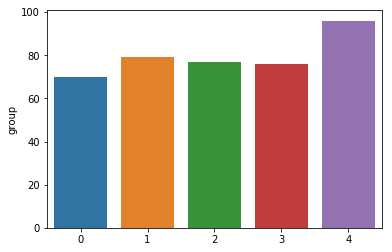

In [858]:
sns.barplot(X['group'].unique(),X['group'].value_counts())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E152C89CF8>,
      dtype=object)

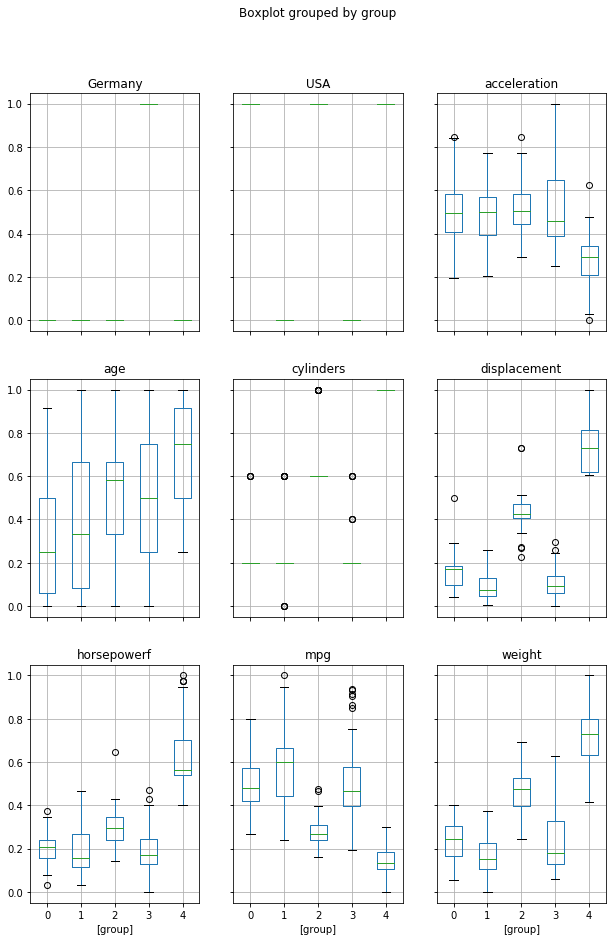

In [859]:
X.boxplot(by='group', figsize=(10,15))

[[ 5.02449608e-01  2.21052632e-01  1.55361757e-01  2.39386388e-01
   5.00626566e-01  1.99549485e-01  3.17982456e-01  1.00000000e+00
  -2.77555756e-16]
 [ 5.70495556e-01  2.20253165e-01  8.96869787e-02  1.72449064e-01
   4.86437613e-01  1.83888277e-01  3.79746835e-01 -7.77156117e-16
  -2.77555756e-16]
 [ 2.75075988e-01  6.36363636e-01  4.27161985e-01  4.70006886e-01
   5.15924552e-01  2.95207510e-01  5.33549784e-01  1.00000000e+00
  -2.77555756e-16]
 [ 5.02431611e-01  2.31428571e-01  1.06312292e-01  2.29741990e-01
   5.23044218e-01  1.89829193e-01  5.15476190e-01 -7.77156117e-16
   1.00000000e+00]
 [ 1.46165780e-01  1.00000000e+00  7.26717270e-01  7.19662603e-01
   2.75793651e-01  6.29189312e-01  7.01388889e-01  1.00000000e+00
  -3.05311332e-16]]


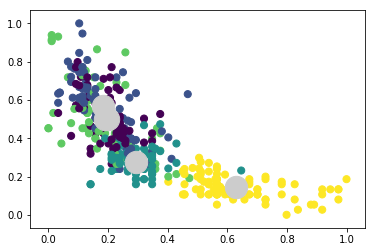

In [860]:
plt.scatter(X['horsepowerf'], X['mpg'], c=X['group'],
            s=50, cmap='viridis');
print(kmc_5.cluster_centers_)
plt.scatter(kmc_5.cluster_centers_[:,5],kmc_5.cluster_centers_[:,0],s=500,c='0.8')

[[ 5.02449608e-01  2.21052632e-01  1.55361757e-01  2.39386388e-01
   5.00626566e-01  1.99549485e-01  3.17982456e-01  1.00000000e+00
  -2.77555756e-16]
 [ 5.70495556e-01  2.20253165e-01  8.96869787e-02  1.72449064e-01
   4.86437613e-01  1.83888277e-01  3.79746835e-01 -7.77156117e-16
  -2.77555756e-16]
 [ 2.75075988e-01  6.36363636e-01  4.27161985e-01  4.70006886e-01
   5.15924552e-01  2.95207510e-01  5.33549784e-01  1.00000000e+00
  -2.77555756e-16]
 [ 5.02431611e-01  2.31428571e-01  1.06312292e-01  2.29741990e-01
   5.23044218e-01  1.89829193e-01  5.15476190e-01 -7.77156117e-16
   1.00000000e+00]
 [ 1.46165780e-01  1.00000000e+00  7.26717270e-01  7.19662603e-01
   2.75793651e-01  6.29189312e-01  7.01388889e-01  1.00000000e+00
  -3.05311332e-16]]


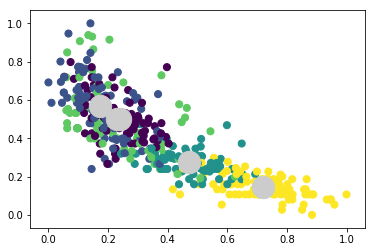

In [861]:
plt.scatter(X['weight'], X['mpg'], c=X['group'],
            s=50, cmap='viridis');
print(kmc_5.cluster_centers_)
plt.scatter(kmc_5.cluster_centers_[:,3],kmc_5.cluster_centers_[:,0],s=500,c='0.8')

[[ 5.02449608e-01  2.21052632e-01  1.55361757e-01  2.39386388e-01
   5.00626566e-01  1.99549485e-01  3.17982456e-01  1.00000000e+00
  -2.77555756e-16]
 [ 5.70495556e-01  2.20253165e-01  8.96869787e-02  1.72449064e-01
   4.86437613e-01  1.83888277e-01  3.79746835e-01 -7.77156117e-16
  -2.77555756e-16]
 [ 2.75075988e-01  6.36363636e-01  4.27161985e-01  4.70006886e-01
   5.15924552e-01  2.95207510e-01  5.33549784e-01  1.00000000e+00
  -2.77555756e-16]
 [ 5.02431611e-01  2.31428571e-01  1.06312292e-01  2.29741990e-01
   5.23044218e-01  1.89829193e-01  5.15476190e-01 -7.77156117e-16
   1.00000000e+00]
 [ 1.46165780e-01  1.00000000e+00  7.26717270e-01  7.19662603e-01
   2.75793651e-01  6.29189312e-01  7.01388889e-01  1.00000000e+00
  -3.05311332e-16]]


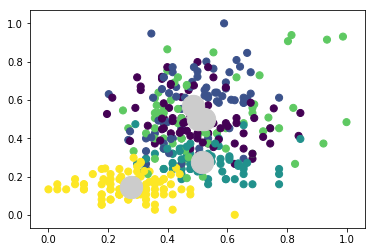

In [862]:
plt.scatter(X['acceleration'], X['mpg'], c=X['group'],
            s=50, cmap='viridis');
print(kmc_5.cluster_centers_)
plt.scatter(kmc_5.cluster_centers_[:,4],kmc_5.cluster_centers_[:,0],s=500,c='0.8')

In [834]:
## Inverse transform so that the group can be analyzed better

cols = ['mpg','cylinders','displacement','weight','acceleration','horsepowerf','age','USA','Germany']
X5_i = pd.DataFrame(mm.inverse_transform(X[['mpg','cylinders','displacement','weight','acceleration','horsepowerf','age','USA','Germany']]),columns=cols)
X5_i['group'] = X['group']

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


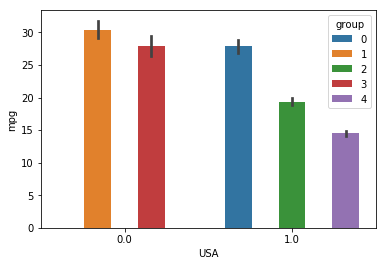

In [835]:
sns.barplot(x='USA',y='mpg',data=X5_i,hue='group')

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


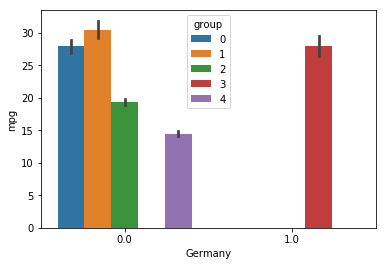

In [836]:
sns.barplot(x='Germany',y='mpg',data=X5_i,hue='group')

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


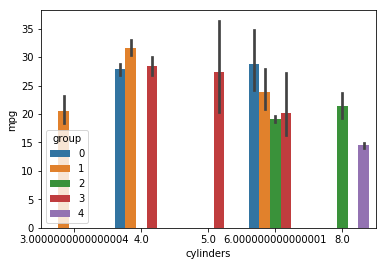

In [837]:
sns.barplot(x='cylinders',y='mpg',data=X5_i,hue='group')

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


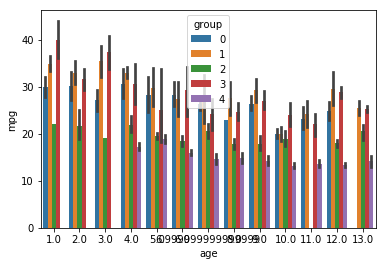

In [838]:
sns.barplot(x='age',y='mpg',data=X5_i,hue='group')

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\senth\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\senth\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\senth\AIML\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


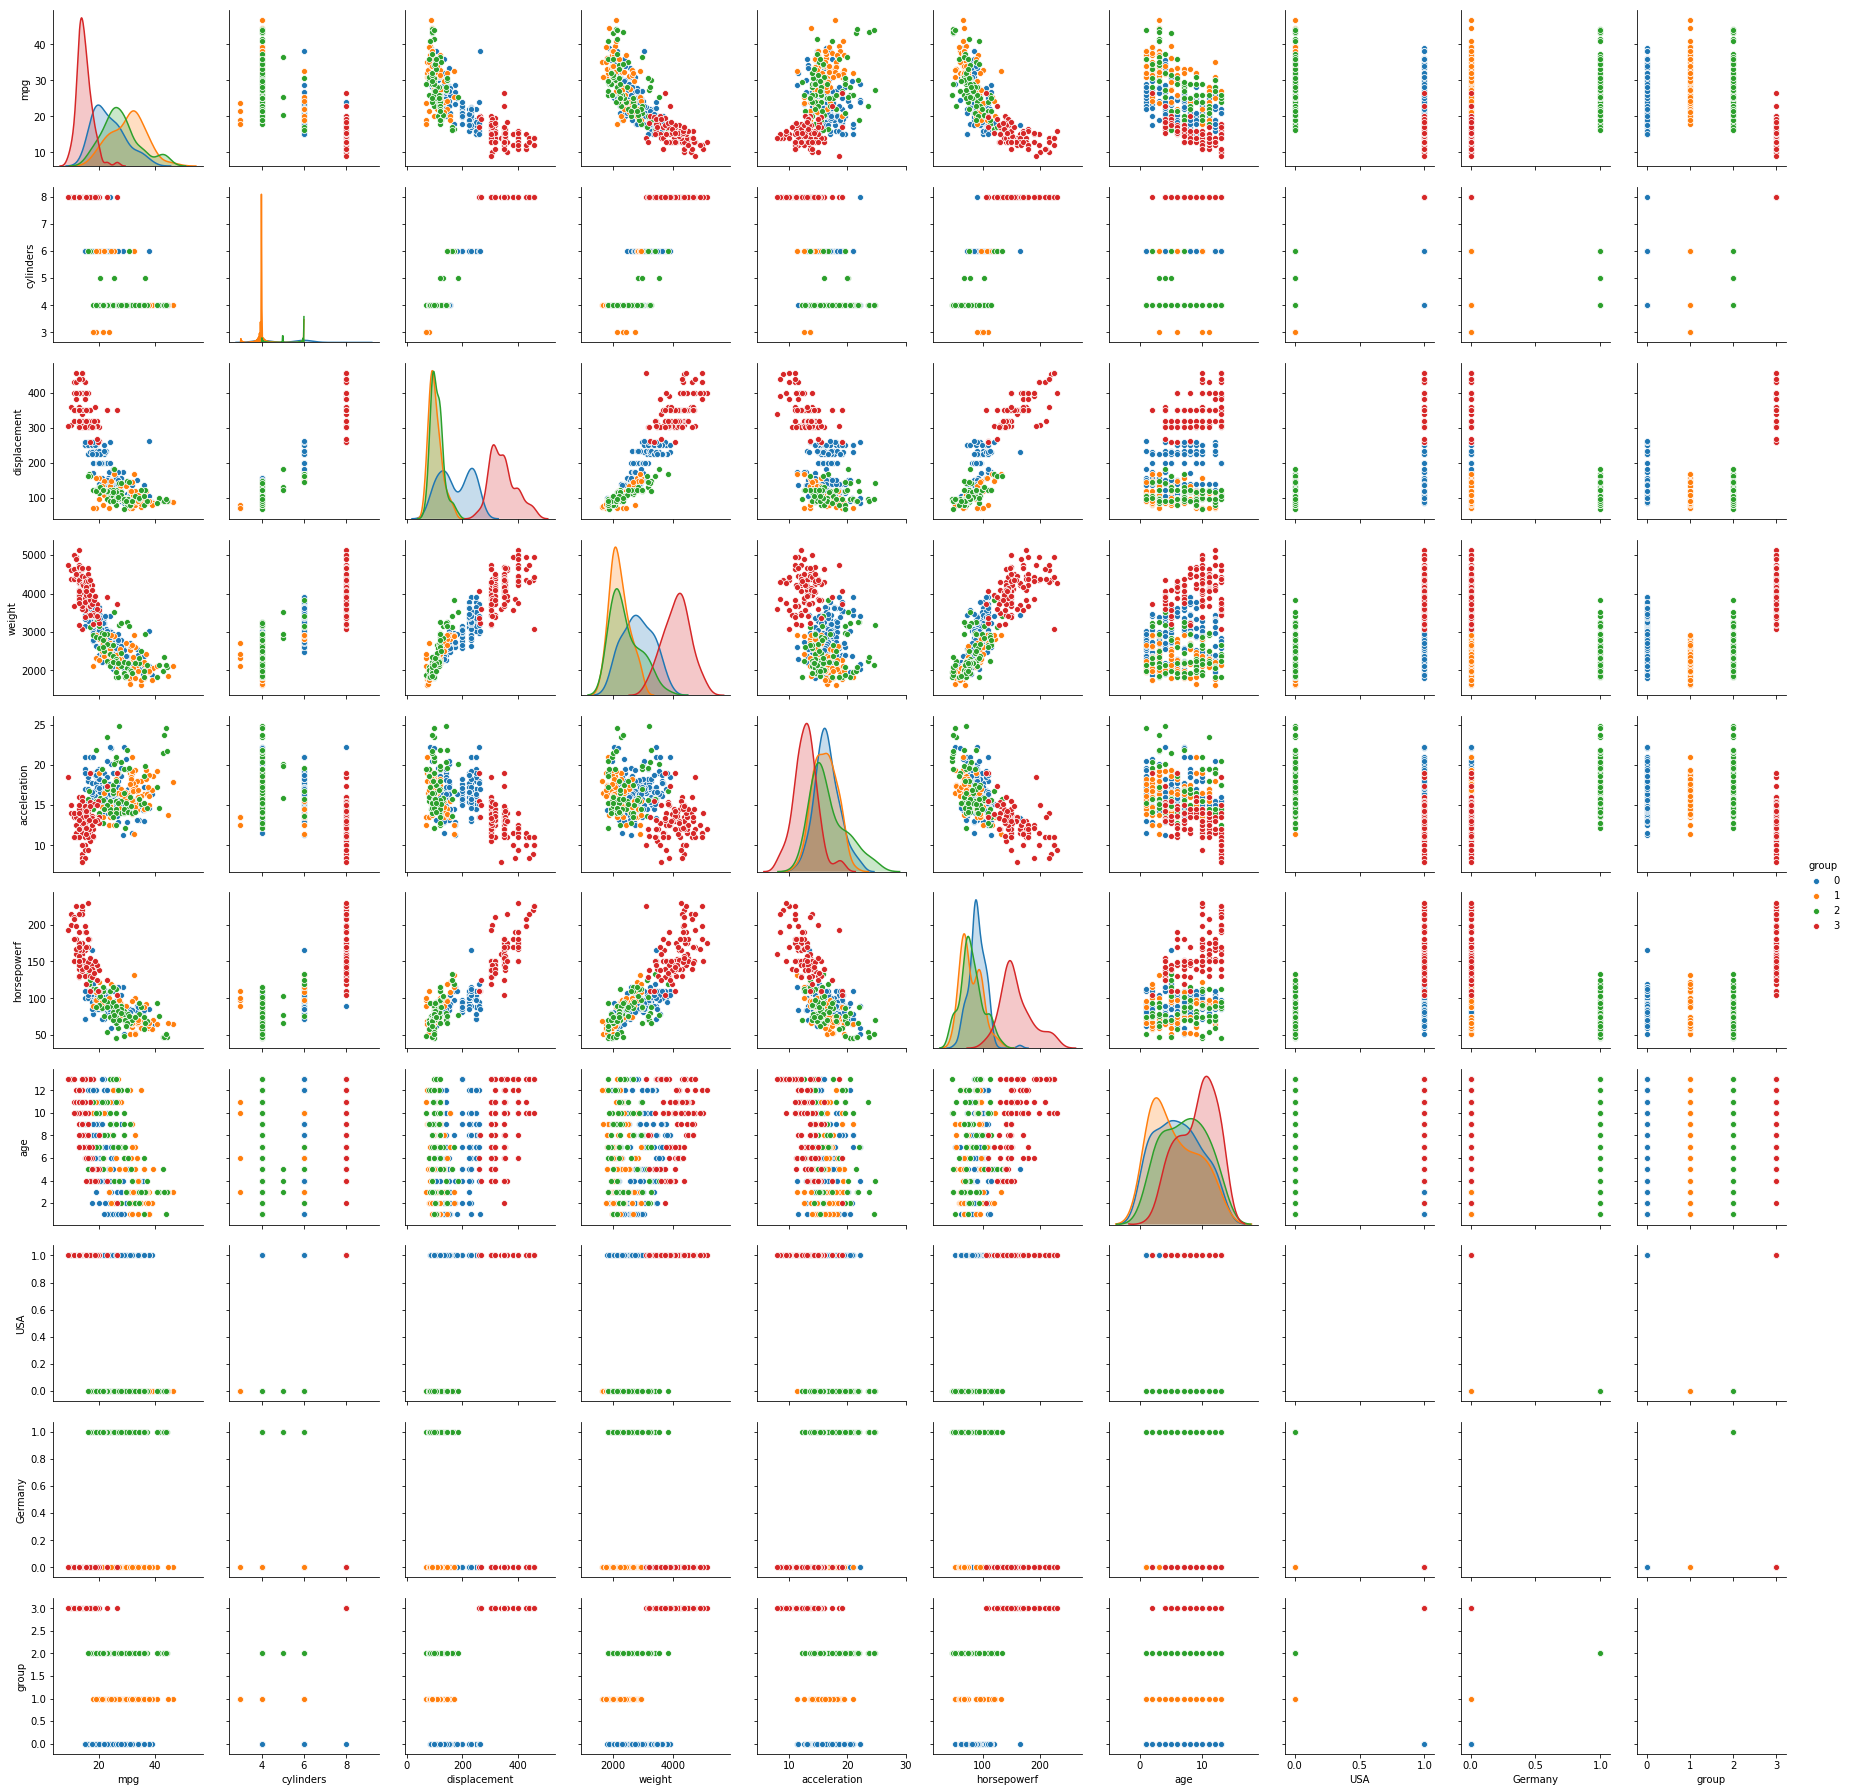

In [839]:
sns.pairplot(X4_i,hue='group',diag_kind='kde')

In [15]:
# Export the data into csv for any further analysis

from pandas import ExcelWriter
writer = ExcelWriter('d:\groups.xls')
cars_df.to_excel(writer,'Sheet1')
writer.save()

In [16]:
# We can try similar analysis for 3 grps as well to check if we get more clear distinction among groups

<h3>No of clusters = 3</h3>

<br>
<u><b>Observations</b></u>
<br>
<li>With 3 clusters, all clusters have balanced number of datapoints
<li>Groupwise Box plot for each of the variables shows clear distinction b/w the groups for all variables except age
<li>Since all variables are standardized using minmax scaler, boxplot shows clear visualization of all variables in one scale
    <br><b> Cluster analysis of Continous variables vs mpg </b>
<li>Scatter plot of continous variables (weight, horsepowerf, acceleration) are plotted against mpg in 2D with cluster and 
    cluster center shows how the clusters are grouped. <br>
<li>Yellow colored cluster datapoints that has high Weight and horsepowerf, but less mpg and acceleration are clearly separated
<li>Dark Green colored cluster datapoints that has second high Weight and horsepowerf, but high mpg and acceleration compared to yellow clusters
<li> Black colored cluster datapoints that has third high Weight and horsepowerf, but high mpg and acceleration compared to dark green clusters
<li>Dark green  and black clusters are pretty closely located and has some overlap, but still has clear line of separation
    <br><b> Cluster analysis of Categorical variables vs mpg </b>
<li><u>cylinders</u> - Not all clusters have equal representation of cylinders, but the overall info is that 4-cylindered vehicles have higher mpg
<li><u>age</u> - All age vehicles except 1 and 3 has equal representation in all clusters
<li><u>origin</u>- USA origin vehicles has representation in 2 clusters and Germany,Japan each has representation in other 1 cluster
<br>
<br>
    <b><u>Summary</u></b>
    <br>The total inertia/cluster error is around 110 for 3 clusters. But, out of 3 clusters, three clusters are able to differentiate the characteristics of auto dataset clearly to an extent
    <br> Hence, 3 clusters can be optimal for this auto mpg dataset

[[ 5.38519206e-01  2.25503356e-01  9.74975287e-02  1.99365204e-01
   5.03635347e-01  1.86679311e-01  4.43512304e-01  1.22124533e-15
   4.69798658e-01]
 [ 1.56263037e-01  1.00000000e+00  7.17940923e-01  7.11236011e-01
   2.89565826e-01  6.13970588e-01  6.78921569e-01  1.00000000e+00
  -3.05311332e-16]
 [ 3.90885077e-01  4.06802721e-01  2.80502382e-01  3.46431513e-01
   5.08260447e-01  2.42679681e-01  4.30839002e-01  1.00000000e+00
  -3.33066907e-16]]
110.32565135075492
0.4320477371116615
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 2 0 0 0 0 0 0 2 1 1 1 1 0 2 0 2 2 2 2 2
 2 1 1 1 1 1 1 1 2 2 2 2 2 0 0 0 0 0 0 2 0 2 0 2 2 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 0 0 2 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 0 1 1 1 1 2 0 2 0
 0 2 2 0 1 1 0 0 0 0 1 0 0 1 2 2 2 2 0 2 0 2 2 2 2 1 1 1 1 1 0 0 0 0 0 2 0
 0 0 0 0 2 2 2 2 1 1 1 1 2 2 2 2 2 1 1 0 2 2 2 0 0 0 2 0 2 0 0 0 0 0 0 0 2
 2 0 1 1 1 1 2 2 2 2 2 2 0 0 2 2 2 2 0 0 0 2 0 1 0 0 0 1 1 1 1 0 2 0 2 0 1
 1 1 1 2 2 2 2 1 1 1 1 0 2 0 2 2 2 0 0 0 0 0 0 2 0 0 0 1 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E155FA5978>,
      dtype=object)

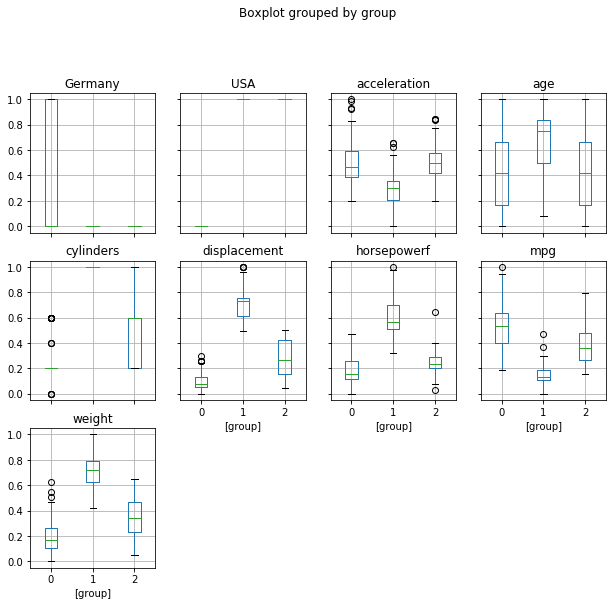

In [891]:
X.drop('group',axis=1,inplace=True)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k=3
kmc_3 = KMeans(n_clusters=k,random_state=1)
kmc_3.fit(X)
print(kmc_3.cluster_centers_)
print(kmc_3.inertia_)
print(silhouette_score(X,kmc_3.labels_))
print(kmc_3.labels_)
print(pd.Series(kmc_3.labels_).value_counts())
X['group'] = kmc_3.predict(X)
X.boxplot(by='group', layout=(5,4),figsize=(10,15))

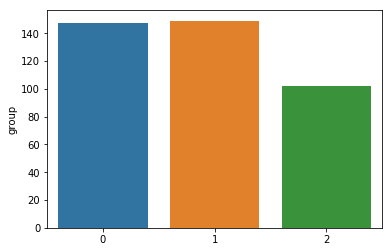

In [880]:
sns.barplot(X['group'].unique(),X['group'].value_counts())

[[ 5.38519206e-01  2.25503356e-01  9.74975287e-02  1.99365204e-01
   5.03635347e-01  1.86679311e-01  4.43512304e-01  1.22124533e-15
   4.69798658e-01]
 [ 1.56263037e-01  1.00000000e+00  7.17940923e-01  7.11236011e-01
   2.89565826e-01  6.13970588e-01  6.78921569e-01  1.00000000e+00
  -3.05311332e-16]
 [ 3.90885077e-01  4.06802721e-01  2.80502382e-01  3.46431513e-01
   5.08260447e-01  2.42679681e-01  4.30839002e-01  1.00000000e+00
  -3.33066907e-16]]


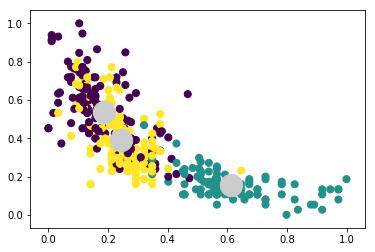

In [881]:
plt.scatter(X['horsepowerf'], X['mpg'], c=X['group'],
            s=50, cmap='viridis');
print(kmc_3.cluster_centers_)
plt.scatter(kmc_3.cluster_centers_[:,5],kmc_3.cluster_centers_[:,0],s=500,c='.80')

[[ 5.38519206e-01  2.25503356e-01  9.74975287e-02  1.99365204e-01
   5.03635347e-01  1.86679311e-01  4.43512304e-01  1.22124533e-15
   4.69798658e-01]
 [ 1.56263037e-01  1.00000000e+00  7.17940923e-01  7.11236011e-01
   2.89565826e-01  6.13970588e-01  6.78921569e-01  1.00000000e+00
  -3.05311332e-16]
 [ 3.90885077e-01  4.06802721e-01  2.80502382e-01  3.46431513e-01
   5.08260447e-01  2.42679681e-01  4.30839002e-01  1.00000000e+00
  -3.33066907e-16]]


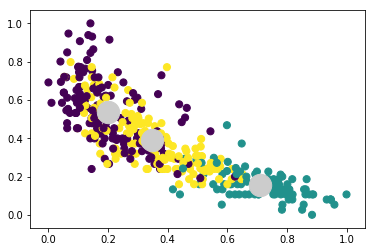

In [882]:
plt.scatter(X['weight'], X['mpg'], c=X['group'],
            s=50, cmap='viridis');
print(kmc_3.cluster_centers_)
plt.scatter(kmc_3.cluster_centers_[:,3],kmc_3.cluster_centers_[:,0],s=500,c='.80')

[[ 5.38519206e-01  2.25503356e-01  9.74975287e-02  1.99365204e-01
   5.03635347e-01  1.86679311e-01  4.43512304e-01  1.22124533e-15
   4.69798658e-01]
 [ 1.56263037e-01  1.00000000e+00  7.17940923e-01  7.11236011e-01
   2.89565826e-01  6.13970588e-01  6.78921569e-01  1.00000000e+00
  -3.05311332e-16]
 [ 3.90885077e-01  4.06802721e-01  2.80502382e-01  3.46431513e-01
   5.08260447e-01  2.42679681e-01  4.30839002e-01  1.00000000e+00
  -3.33066907e-16]]


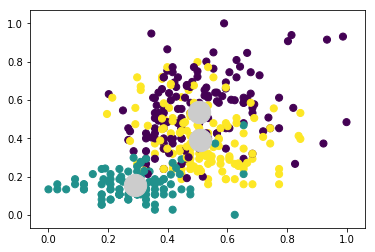

In [883]:
plt.scatter(X['acceleration'], X['mpg'], c=X['group'],
            s=50, cmap='viridis');
print(kmc_3.cluster_centers_)
plt.scatter(kmc_3.cluster_centers_[:,4],kmc_3.cluster_centers_[:,0],s=500,c='.80')

In [884]:
## Inverse transform so that the group can be analyzed better

cols = ['mpg','cylinders','displacement','weight','acceleration','horsepowerf','age','USA','Germany']
X3_i = pd.DataFrame(mm.inverse_transform(X[['mpg','cylinders','displacement','weight','acceleration','horsepowerf','age','USA','Germany']]),columns=cols)
X3_i['group'] = X['group']

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


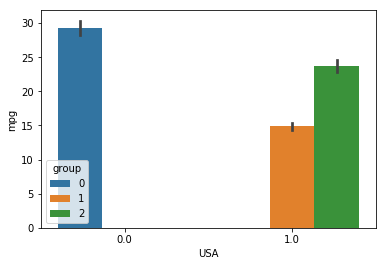

In [885]:
sns.barplot(x='USA',y='mpg',data=X3_i,hue='group')

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


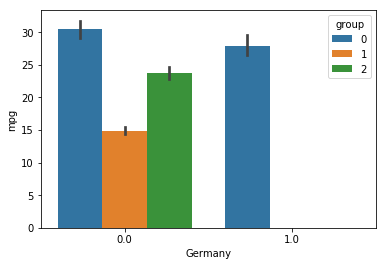

In [886]:
sns.barplot(x='Germany',y='mpg',data=X3_i,hue='group')

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


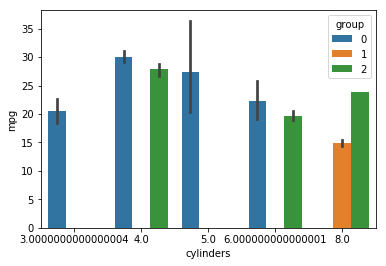

In [887]:
sns.barplot(x='cylinders',y='mpg',data=X3_i,hue='group')

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


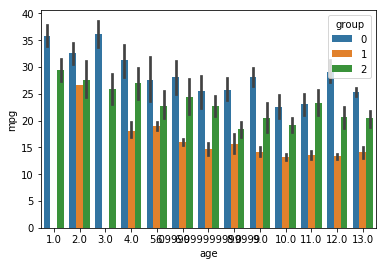

In [888]:
sns.barplot(x='age',y='mpg',data=X3_i,hue='group')

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\senth\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\senth\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\senth\AIML\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


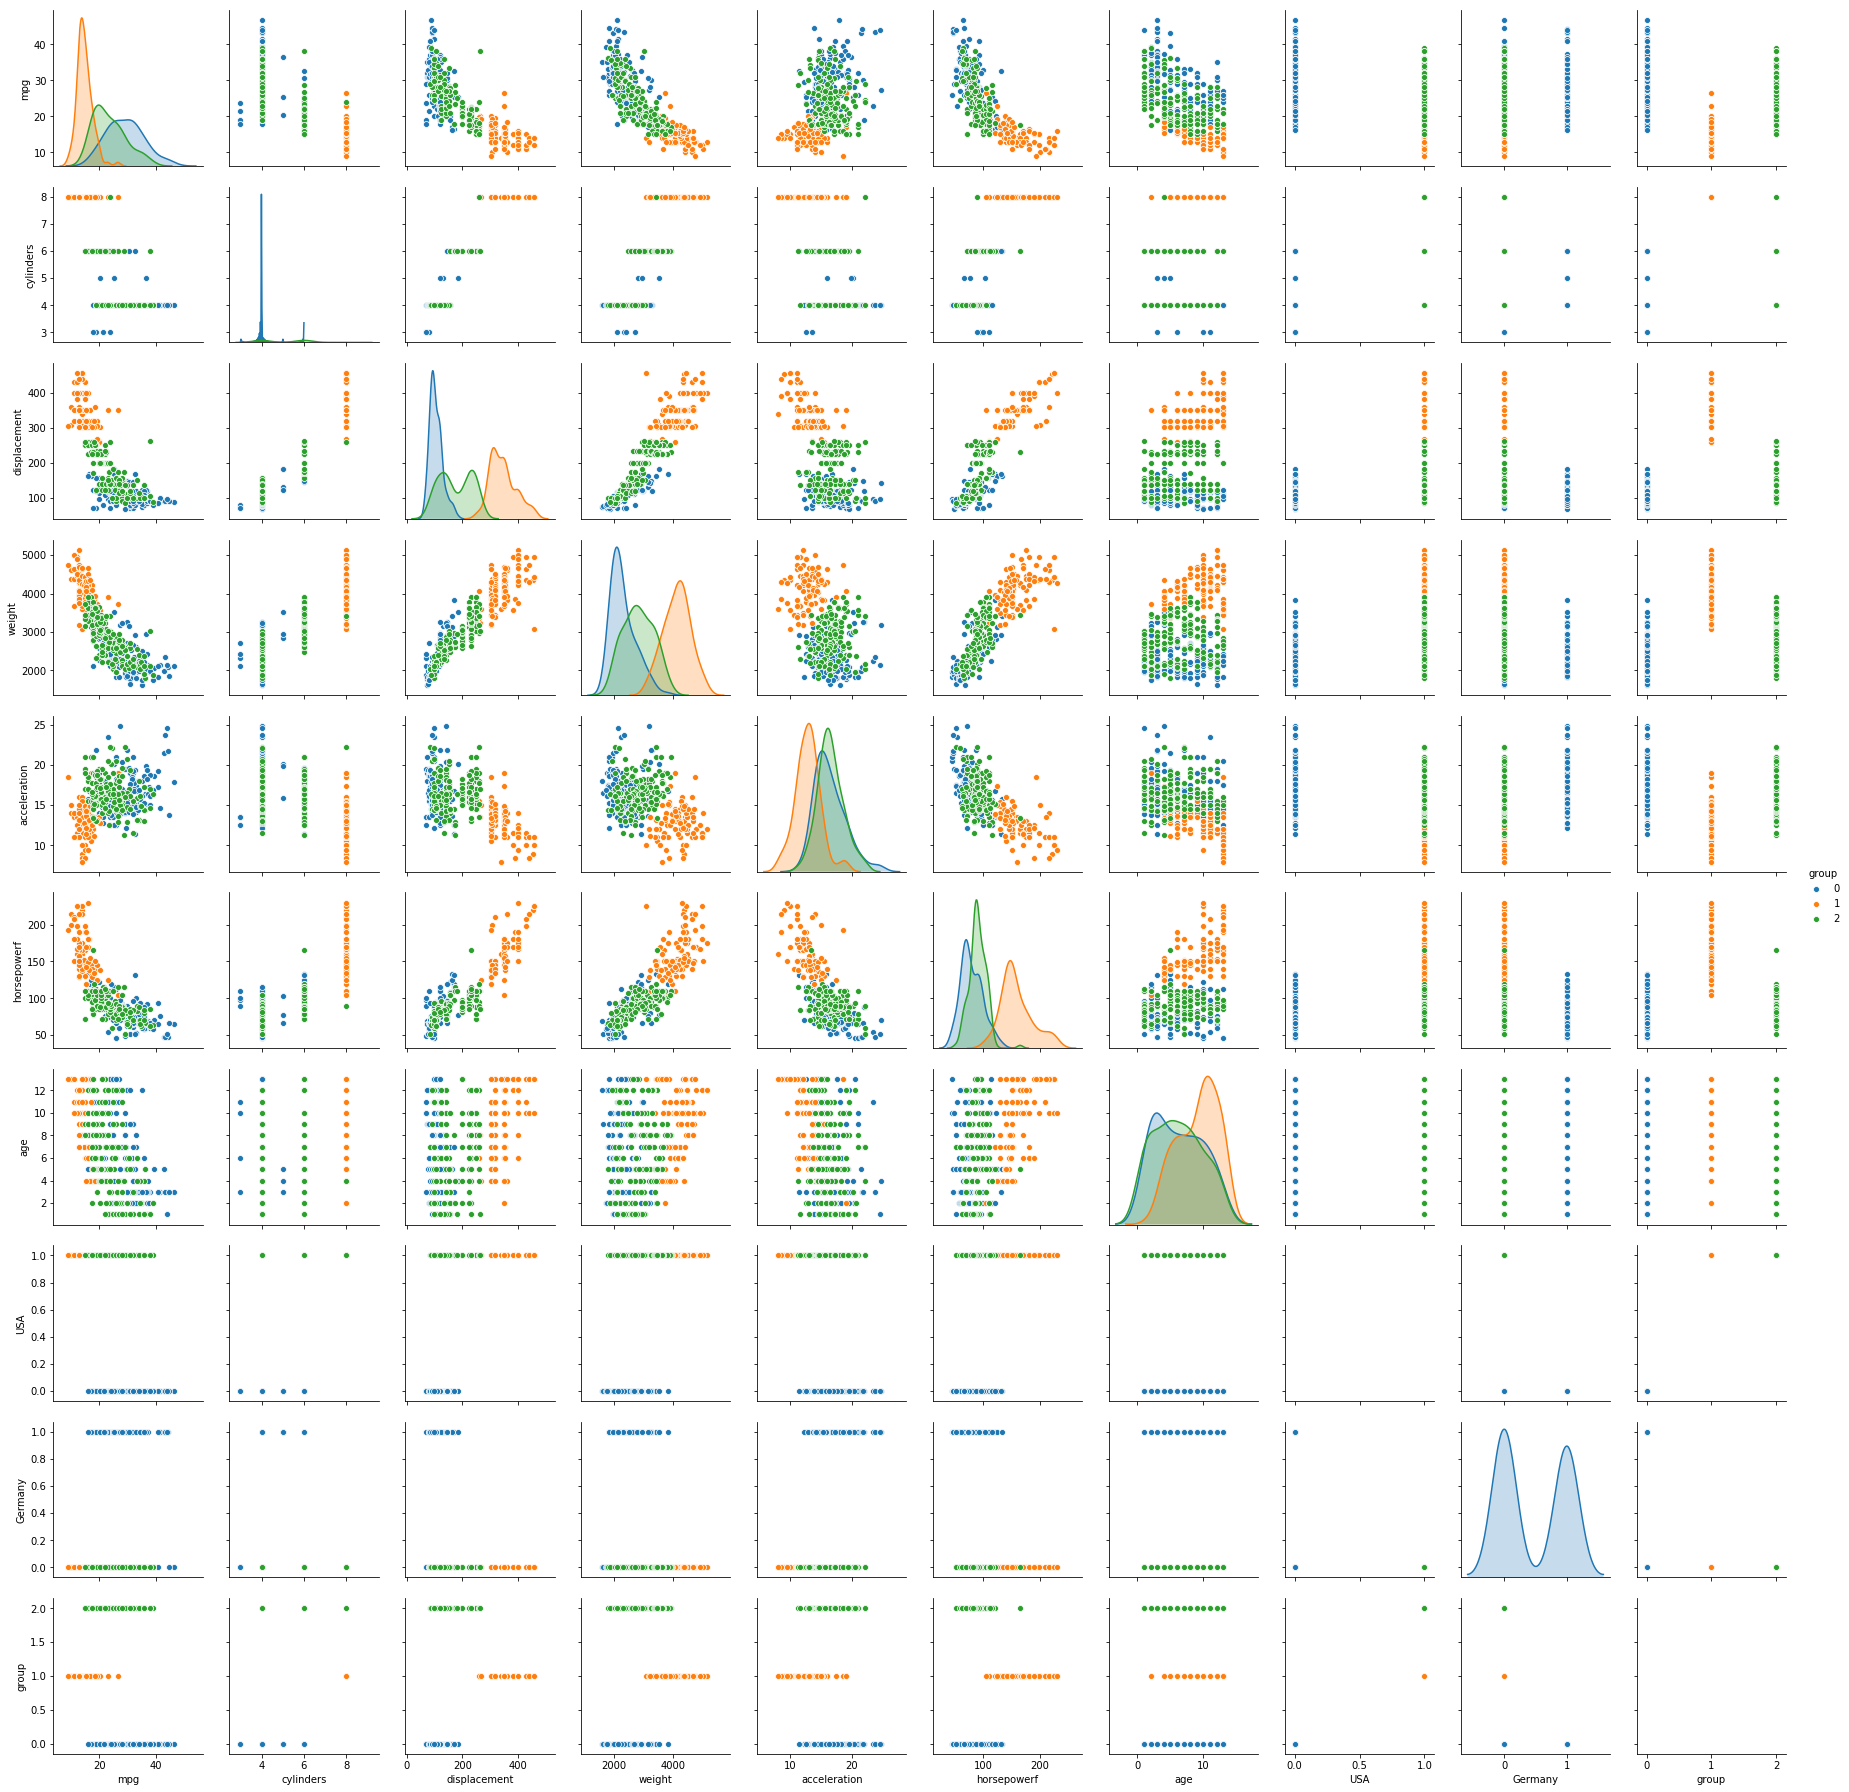

In [889]:
sns.pairplot(X3_i,hue='group',diag_kind='kde')

In [890]:
cols = ['group']
for col in cols:
    for x in X[col].unique():
        X1_origin = X[X[col]==x][['cylinders','displacement','weight','acceleration','horsepowerf','age','USA','Germany']]
        Y1_origin = X[X[col]==x]['mpg']
        X1_o_train,X1_o_test,Y1_o_train,Y1_o_test = train_test_split(X1_origin,Y1_origin,test_size=0.2,random_state=1)
        lr.fit(X1_o_train,Y1_o_train)
        print('accuracy score for ',X[X[col]==x].count(),' count of col - ',col,' with value ',x, ' is ',lr.score(X1_o_test,Y1_o_test))
        Y1_o_predict = lr.predict(X1_o_test)
        ##print(X1_origin.info())
        ##plt.plot(Y1_o_predict,Y1_o_test)


accuracy score for  mpg             102
cylinders       102
displacement    102
weight          102
acceleration    102
horsepowerf     102
age             102
USA             102
Germany         102
group           102
dtype: int64  count of col -  group  with value  1  is  0.6619069879636683
accuracy score for  mpg             149
cylinders       149
displacement    149
weight          149
acceleration    149
horsepowerf     149
age             149
USA             149
Germany         149
group           149
dtype: int64  count of col -  group  with value  0  is  0.6795366950318602
accuracy score for  mpg             147
cylinders       147
displacement    147
weight          147
acceleration    147
horsepowerf     147
age             147
USA             147
Germany         147
group           147
dtype: int64  count of col -  group  with value  2  is  0.8349392833790119
